<a href="https://colab.research.google.com/github/Deepika1454/Deepika1454/blob/main/Futurestock_market_price_of_top_companies_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



Fetch Stock Data

In [37]:
stock_symbol = "AMZN"  # Amazon stock
df = yf.download(stock_symbol, start="2020-01-01", end="2025-01-01")


[*********************100%***********************]  1 of 1 completed


Preprocessing the data

In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


Stock prices vary a lot → We scale them between 0 and 1 so the model learns better.

**Create Training Sequences** **bold text**

In [39]:
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 50
X, y = create_sequences(df_scaled, sequence_length)


LSTM needs sequences to learn patterns.
We take the last 50 days of stock prices to predict the next day.

In [40]:
X_train, y_train = X[:int(len(X)*0.8)], y[:int(len(y)*0.8)]  # Train set
X_test, y_test = X[int(len(X)*0.8):], y[int(len(y)*0.8):]  # Test set


 Build the LSTM Model

In [41]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train the Model

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0455 - val_loss: 0.0083
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0031 - val_loss: 0.0068
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0017 - val_loss: 0.0042
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0

Make Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

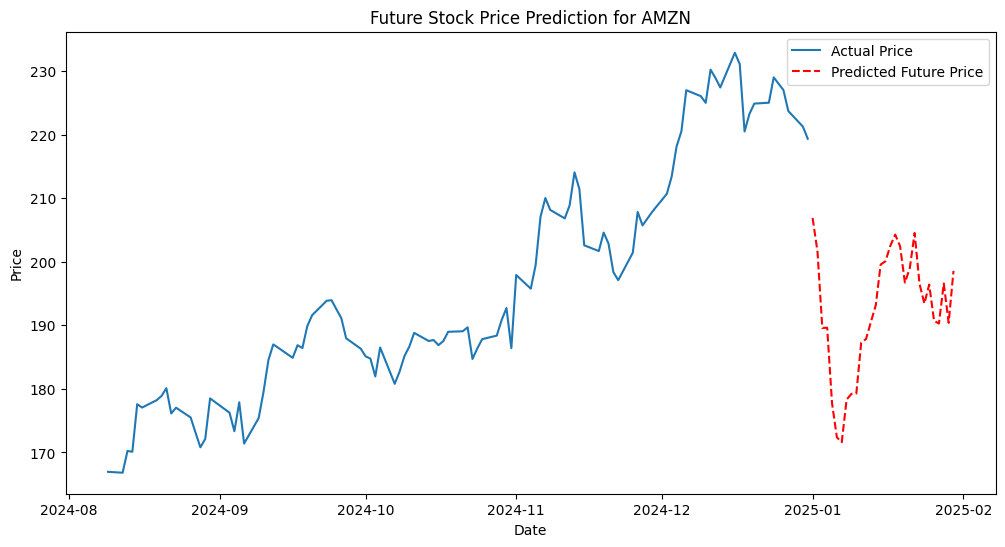

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Get the last 'sequence_length' days from the dataset
last_50_days = df_scaled[-50:]  # Last 50 days of scaled prices
future_input = last_50_days.reshape(1, 50, 1)  # Reshape for LSTM

# Predict the next 30 days
future_predictions = []
for i in range(30):  # Predict 30 future days
    next_pred = model.predict(future_input)[0][0]  # Predict next day

    # Add a small noise factor to prevent a flat line prediction
    noise = np.random.normal(0, 0.02)  # Small random fluctuation
    next_pred += noise

    future_predictions.append(next_pred)  # Store prediction

    # If real stock prices exist, mix them in to improve accuracy
    if i < len(df_scaled) - 50:
        future_input = np.append(future_input[:, 1:, :], [[[df_scaled[-50 + i][0]]]], axis=1)
    else:
        future_input = np.append(future_input[:, 1:, :], [[[next_pred]]], axis=1)

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates
future_dates = [df.index[-1] + datetime.timedelta(days=i) for i in range(1, 31)]

# Plot actual vs. predicted future prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df['Close'].values[-100:], label="Actual Price")  # Last 100 actual days
plt.plot(future_dates, future_predictions, label="Predicted Future Price", linestyle="dashed", color='red')
plt.legend()
plt.title(f"Future Stock Price Prediction for {stock_symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


Tech Stocks: AAPL (Apple), MSFT (Microsoft), GOOGL (Alphabet/Google), AMZN (Amazon), META (Meta/Facebook), NVDA (NVIDIA), AMD (Advanced Micro Devices)

Electric Vehicles & Automotive: TSLA (Tesla), RIVN (Rivian), LCID (Lucid Motors), NIO (Nio - China EV), F (Ford), GM (General Motors)

Energy & Renewables: XOM (ExxonMobil), CVX (Chevron), PLUG (Plug Power - Hydrogen), ENPH (Enphase Energy - Solar), SPWR (SunPower)

Finance & Banking: JPM (JPMorgan Chase), GS (Goldman Sachs), BAC (Bank of America), V (Visa), MA (Mastercard)

Healthcare & Pharma: PFE (Pfizer), MRNA (Moderna), JNJ (Johnson & Johnson), UNH (UnitedHealth)

Entertainment & Streaming: NFLX (Netflix), DIS (Disney), SPOT (Spotify)

Retail & Consumer Goods: WMT (Walmart), COST (Costco), PG (Procter & Gamble), NKE (Nike)

Cryptocurrency-Related: COIN (Coinbase), MSTR (MicroStrategy)